***Abalone dataset ML model with Keras***

Lech Stanisław Kalinowski, 2019 

All Rights Reserved, under GPLv3 License.

Elipsoid Approximation
$V = \frac{4}{3}*\pi*a*b*c$ $[mm^3 = mm*mm*mm]$

where: a = "height" / 2, b = "diameter" / 2, c = "length" / 2 

Single spicies density: $\rho = \frac{m}{V} [\frac{g}{mm^3}]$

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

1. Basic data mining.

4175 no. of measurements all zero values removed.
4174 no. of measurements all zero values removed.


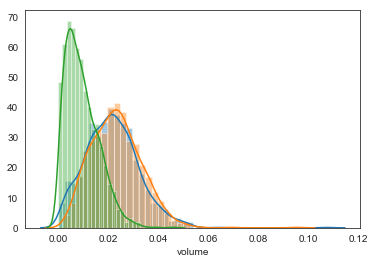

In [6]:
column_names = ["sex", "length", "diameter", "height", "wholeWeight", "shuckedWeight", "visceraWeight", "shellWeight", "rings", "age", "volume", "density"]

#[dim_less], [mm], [mm], [mm], [mm], [g], [g], [g], [g], [dim_less], [mm^3], [g/mm^3] 

data0 = pd.read_csv("abalone.data0", names=column_names)

# Drpoing rows when value 0 occures.

data0 = data0[(data0 != 0).all(1)]

data0["age"] = data0["rings"] + 1.5
data0["volume"] = (4/3)*np.pi*((data0["height"]/2)*(data0["diameter"]/2)*(data0["length"]/2))
data0["density"] = data0["wholeWeight"]/data0["volume"]

# Droping strongly protruding value (anomaly).

data0 = data0.loc[data0['density']!=data0['density'].max()]

dataM = data0.loc[data0["sex"] == 'M']
dataF = data0.loc[data0["sex"] == 'F']
dataI = data0.loc[data0["sex"] == 'I']

sns.set_style("white")
sns.distplot(dataM["volume"])
sns.distplot(dataF["volume"])
sns.distplot(dataI["volume"])

# 0 - Male, 1 - Female, 2 - Infant

data0["sex"] = data0["sex"].map(lambda x: 0 if x=="M" else (1 if x=="F" else 2 ))

print(str(len(data0)) + ' no. of measurements all zero values removed.')

data = data0.drop(columns=["age", "sex"])

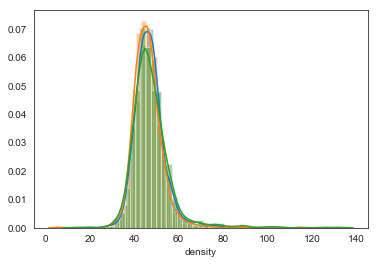

In [5]:
sns.set_style("white")
sns.distplot(dataM["density"])
sns.distplot(dataF["density"])
sns.distplot(dataI["density"])

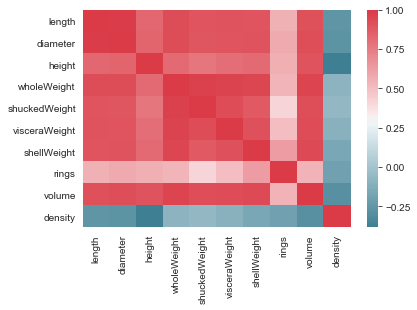

In [4]:
corr = data.corr()
sns.set_style("white")
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, cmap=sns.diverging_palette(220, 10, as_cmap=True))

Conclusions: Density of species are independent from age and physical sizes and stay constant.

Attention: the biggest Abalone snail in this dataset have 1.1 mm in height for 30 yers old Abalone. This measurements are quite suprising. Unfortunatley the availibility to the orginal work is limited. I start to event think that is a mistake and someone use SI metrics instead of Imperial Units (inch and oz.). But probably this is some special small species. 

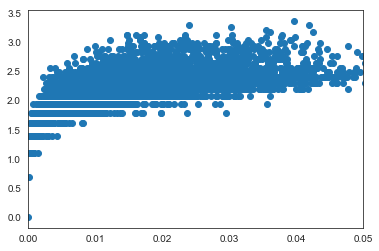

In [7]:
plt.xlim(right = 0.05)
plt.scatter(data["volume"], np.log(data["rings"]))

Conclusions: Volume are great training feature for regresive models.

Data preparation for deep learning. Used DNN clasiffier is perform using Keras framewok. At backend is TensorFlow configured on Nvidia GPU. This clasiffier predicts 10 classes. It means that integer no. of rings on range from 1 to 29 are maped on matrix 10 x 10 and converted to a tensor (array of arrays).

In [15]:
# Indexes for no. of rings mapping.

ringsMapping_index_init = data["rings"].min()
ringsMapping_index_final = data["rings"].max()
ringsMapping_index_lower_final = 10 
y_30 = np.zeros((ringsMapping_index_final, ringsMapping_index_final))

# Data structures.

np_data = np.zeros
np_data = data.values

y = np.zeros((ringsMapping_index_lower_final, ringsMapping_index_lower_final))
new_y = np.zeros((len(np_data), ringsMapping_index_lower_final))

print (np_data.shape)
print (y.shape)

# Maping matrix.

for i in range (ringsMapping_index_init-1, ringsMapping_index_lower_final):
    for j in range (ringsMapping_index_init-1, ringsMapping_index_lower_final):        
        if (i == j):
            y[i][j] = 1

# Informational table.

print ('\n No., ', 'Vec., ', 'No. of Rings')
print ('1', y[0], ' - 1, 2, 3')
print ('2', y[1], ' - 4, 5, 6')
print ('3', y[2], ' - 7, 8, 9')
print ('4', y[3], ' - 10, 11, 12')
print ('5', y[4], ' - 13, 14, 15')
print ('6', y[5], ' - 16, 17, 18')
print ('7', y[6], ' - 19, 20, 21')
print ('8', y[7], ' - 22, 23, 24')
print ('9', y[8], ' - 25, 26, 27')
print ('10', y[9], ' - 28, 29, 30\n')

# Tensor classes mapping. Feature tensor.
            
for k in range(0, len(np_data)):
    temp_int = int(np_data[k,7])
    temp_int_rings_val = (int( temp_int / 3) )
    if (temp_int%3 == 0):
        temp0_int_rings_val = temp_int_rings_val - 1
        temp_y = y[ temp0_int_rings_val ]
        #print ('k= ', k, ', temp_int= ', temp_int, ', temp_y= ', temp_y, ', temp_int_rings_val=', temp_int_rings_val, 'modulo 0 OK!')
        new_y[k] = temp_y
    else:
        temp_y = y[ temp_int_rings_val ]
        #print('k= ', k, ', temp_int= ', temp_int, ', temp_y= ', temp_y, ', temp_int_rings_val=', temp_int_rings_val, 'modulo 1 OK!')
        new_y[k] = temp_y

# Ready dataset for DNN.
#print (y)
#print (new_y)

x_train = np_data[:,0:7]
y_train = new_y

(4174, 10)
(10, 10)

 No.,  Vec.,  No. of Rings
1 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  - 1, 2, 3
2 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]  - 4, 5, 6
3 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]  - 7, 8, 9
4 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]  - 10, 11, 12
5 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]  - 13, 14, 15
6 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]  - 16, 17, 18
7 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]  - 19, 20, 21
8 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]  - 22, 23, 24
9 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]  - 25, 26, 27
10 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]  - 28, 29, 30



Keras DNN clasiffier. TensorFlow configured on Nvidia GPU. 

Dense 64 is a fully-connected layer with 64 hidden units.
In the first layer, you must specify the expected input data shape here, 7-dimensional vectors for fatures and 10-dimensional vectiors for classes

Softmax activation in hidden layers used. Dropout and cross entropy loss function.

Cross validation 3000 probes of training set and 1174 training probes. 10 epochs.

Model saved for further applications as # abalone.h5.


In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD
import numpy as np
from keras.utils import plot_model
import pydot

x_train = np_data[ :3000, 0:7]
y_train = keras.utils.to_categorical(new_y[:3000, 9] , num_classes=10)

# make sure the input is a proper tensor (numpy array)

print(str(type(y_train))+'x')
print(str(type(y_train))+'y')

x_test = np_data[ 3000: , 0:7]
y_test = keras.utils.to_categorical(new_y[3000: , 9] , num_classes=10)

model = Sequential()

model.add(Dense(32, activation='relu', input_dim=7))
model.add(Dropout(0.5))
#return_sequences=True

model.add(Dense(32, activation='softmax'))
model.add(Dropout(0.5))

#model.add(Flatten())
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=10,
          batch_size=100)
score = model.evaluate(x_test, y_test, batch_size=15)

model.save('abalone.h5')

print (model)
#plot_model(model, to_file='Abalone.png')

<class 'numpy.ndarray'>x
<class 'numpy.ndarray'>y
Epoch 1/10
3000/3000 [==============================] - 1s 171us/step - loss: 1.6122 - acc: 0.8677
Epoch 2/10
3000/3000 [==============================] - 0s 72us/step - loss: 0.4310 - acc: 0.9997
Epoch 3/10
3000/3000 [==============================] - 0s 64us/step - loss: 0.1676 - acc: 0.9997
Epoch 4/10
3000/3000 [==============================] - 0s 65us/step - loss: 0.1045 - acc: 0.9997
Epoch 5/10
3000/3000 [==============================] - 0s 65us/step - loss: 0.0772 - acc: 0.9997
Epoch 6/10
3000/3000 [==============================] - 0s 65us/step - loss: 0.0615 - acc: 0.9997
Epoch 7/10
3000/3000 [==============================] - 0s 65us/step - loss: 0.0512 - acc: 0.9997
Epoch 8/10
3000/3000 [==============================] - 0s 67us/step - loss: 0.0441 - acc: 0.9997
Epoch 9/10
3000/3000 [==============================] - 0s 63us/step - loss: 0.0387 - acc: 0.9997
Epoch 10/10
1174/1174 [==============================] - 0s 261us/s


Conclusions: The model is overfitted but its a good base for further work. Epoch 10/10
3000/3000 69us/step - loss: 0.0354 - acc: 0.9997.

Some model testing on new data introduced.

In [44]:
# Some new samples.

abalone_physical_measurements = np.array([[0.565, 0.44, 0.155, 0.9395, 0.4275, 0.214, 0.27]])
abalone_physical_measurements0 = np.array([[0.53, 0.42, 0.135, 0.677, 0.2565, 0.1415, 0.21]])
abalone_physical_measurements1 = np.array([[0.565, 0.44, 0.155, 0.9395, 0.4275, 0.214, 0.27]])
abalone_physical_measurements2 = np.array([[0.615, 0.48, 0.165, 1.1615, 0.513, 0.301, 0.305]])

abalone_physical_measurements3 = np.array([[0.0001,0.00001, 1, 0.0001, 10, 10, 10]])

# Make sure samples are in proper type.
print(str(type(abalone_physical_measurements))+'abalone_physical_measurements')

classes = model.predict(abalone_physical_measurements3)

print (classes)

<class 'numpy.ndarray'>abalone_physical_measurements
[[0.97431016 0.00357288 0.00253561 0.0025392  0.00233898 0.00242471
  0.00244985 0.00312809 0.00341448 0.00328598]]


Conclusions: The model is strongly overfitted. Results displayed shws that for new measurements the predictions categorize with high probability, are recognized as [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  - 1, 2, or 3 rings class. However the further hyperparameter tuning can be applied. Saved model can be reused in other applications. 